## Method of Images

In [6]:
import numpy as np
import math
from matplotlib import pyplot as py
%matplotlib inline

In [7]:
N = 50
x_start, x_end = -2.0,2.0
y_start, y_end = -1.0,1.0
x = np.linspace(x_start, x_end, N)
y = np.linspace(y_start, y_end, N)
X, Y = np.meshgrid(x, y)

In [10]:
class Source:
    """Contains all information for sources"""
    
    def __init__(self, strength, x, y):
        self.strength = strength
        self.x, self.y = x, y
        
    def velocity(self, X, Y):
        
        self.u = (self.strength / (2*math.pi) *
                 (X - self.x) / ((X - self.x)**2 + (Y - self.y)**2))
        self.v = (self.strength / (2*math.pi) *
                 (Y - self.y) / ((X - self.x)**2 + (Y- self.y)**2))
        
    def stream_function(self, X, Y):
        
        self.psi = (self.strength / (2 * math.pi) *
                    np.arctan2((Y - self.y), (X - self.x)))

In [11]:
strength_source = 1.0
x_source, y_source = 0.0, 0.5

#create a source
source = Source(strength_source, x_source, y_source)

source.velocity(X, Y)
source.stream_function(X, Y)

In [15]:
source_image = Source(strength_source, x_source, -y_source)
source_image.velocity(X, Y)
source_image.stream_function(X, Y)

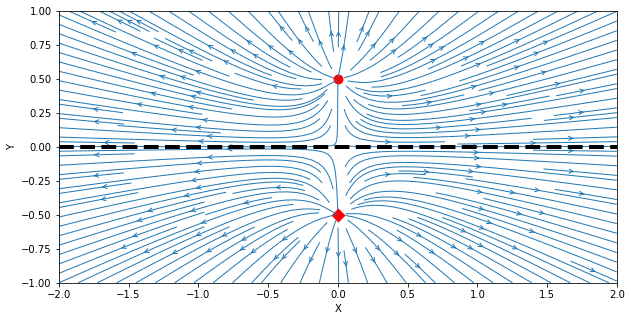

In [17]:
u = source.u + source_image.u
v = source.v + source_image.v
psi = source.psi + source_image.psi

#plot streamlines
width = 10
height = (y_end - y_start) / (x_end - x_start) * width
py.figure(figsize = (width, height))
py.xlabel('X')
py.ylabel('Y')
py.xlim(x_start, x_end)
py.ylim(y_start, y_end)
py.streamplot(X, Y, u, v, density=2, linewidth = 1, arrowsize = 1, arrowstyle = '->')
py.scatter(source.x, source.y, color='r', s=80, marker = 'o')
py.scatter(source_image.x, source_image.y, color = 'r', s=80, marker='D')
py.axhline(0., color='k', linestyle = '--', linewidth = 4);

In [18]:
#create the same for a vortex
class Vortex:
    
    def __init__(self, strength, x, y):
        
        self.strength = strength
        self.x, self.y = x, y
        
    def velocity(self, X, Y):
        
            self.u = (+self.strength / (2 * math.pi) *
                     (Y - self.y) / ((X - self.x)**2 + (Y - self.y)**2))
            self.v = (-self.strength / (2 * math.pi) *
                     (X - self.x) / ((Y - self.y)**2 + (X - self.x)**2))
            
    def stream_function(self, X, Y):
        
        self.psi = (-self.strength / (4 * math.pi) *
                   np.log((X - self.x)**2 + (Y - self.y)**2))

In [23]:
strength_vortex = 1.0
x_vortex, y_vortex = 0.0, 0.5

vortex = Vortex(strength_vortex, x_vortex, y_vortex)
vortex.velocity(X, Y)
vortex.stream_function(X, Y)

vortex_image = Vortex(-strength_source, x_vortex, -y_vortex)
vortex_image.velocity(X, Y)
vortex_image.stream_function(X, Y)

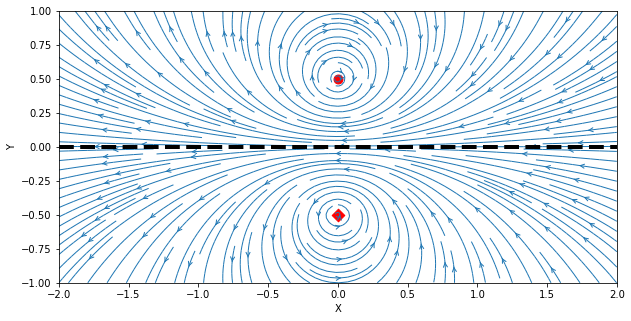

In [24]:
#superpostition of vortex
u = vortex.u + vortex_image.u
v = vortex.v + vortex_image.v
psi = vortex.psi + vortex_image.psi

#plot
width = 10
height = (y_end - y_start) / (x_end - x_start) * width
py.figure(figsize = (width, height))
py.xlabel('X')
py.ylabel('Y')
py.xlim(x_start, x_end)
py.ylim(y_start, y_end)
py.streamplot(X, Y, u, v, density=2, linewidth=1, arrowsize = 1, arrowstyle = '->')
py.scatter(vortex.x, vortex.y, color='r', s=80, marker = 'o')
py.scatter(vortex_image.x, vortex_image.y, color='r', s=80, marker='D')
py.axhline(0., color='k', linestyle='--', linewidth=4);

## Vortex pair near the ground

In [27]:
strength_vortex = 1.0
x_vortex1, y_vortex1 = -0.1, 0.5
x_vortex2, y_vortex2 = +0.1, 0.5

vortex1 = Vortex(+strength_vortex, x_vortex1, y_vortex1)
vortex2 = Vortex(-strength_vortex, x_vortex2, y_vortex2)

#compute velocity and stream function for the two vortex
vortex1.velocity(X, Y)
vortex2.velocity(X, Y)
vortex1.stream_function(X, Y)
vortex2.stream_function(X, Y)

#create mirror image of both vortex
vortex1_image = Vortex(-strength_vortex, x_vortex1, -y_vortex1)
vortex2_image = Vortex(+strength_vortex, x_vortex2, -y_vortex2)

#compute the velocity/stream function of the images
vortex1_image.velocity(X, Y)
vortex2_image.velocity(X, Y)
vortex1_image.stream_function(X, Y)
vortex2_image.stream_function(X, Y)

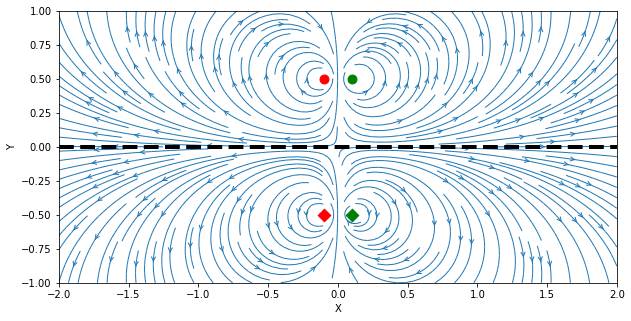

In [28]:
#superposition
u = vortex1.u + vortex2.u + vortex1_image.u + vortex2_image.u
v = vortex1.v + vortex2.v + vortex1_image.v + vortex2_image.v
psi = vortex1.psi + vortex2.psi + vortex1_image.psi + vortex2_image.psi

#plot
width = 10
height = (y_end - y_start) / (x_end - x_start) * width
py.figure(figsize=(width,height))
py.xlabel('X')
py.ylabel('Y')
py.xlim(x_start, x_end)
py.ylim(y_start, y_end)
py.streamplot(X, Y, u, v, density=2, linewidth=1, arrowsize = 1, arrowstyle = '->')
py.scatter(vortex1.x, vortex1.y, color='r', s = 80, marker = 'o')
py.scatter(vortex2.x, vortex2.y, color='g', s = 80, marker = 'o')
py.scatter(vortex1_image.x, vortex1_image.y, color='r', s = 80, marker = 'D')
py.scatter(vortex2_image.x, vortex2_image.y, color='g', s = 80, marker = 'D')
py.axhline(0.0, color = 'k', linestyle = '--', linewidth = 4);